<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [5]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

578.36s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


--2025-09-03 10:45:44--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  40.5MB/s    in 3.8s    

2025-09-03 10:45:49 (40.3 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [6]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

599.32s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


605.71s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [7]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [8]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [9]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [10]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [11]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [12]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [13]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


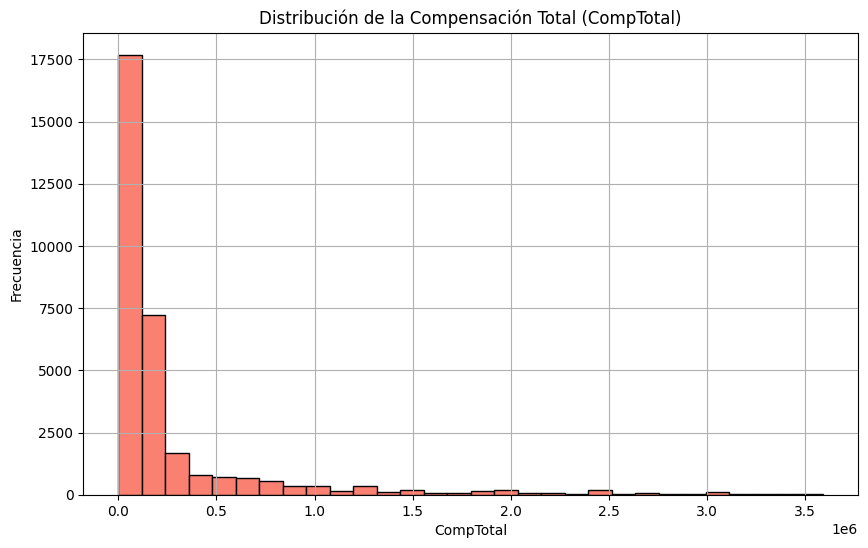

In [14]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Conectamos a la base de datos SQLite
conn = sqlite3.connect('survey-data.sqlite')

# Consulta SQL para extraer la columna CompTotal
QUERY = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""
df_sql = pd.read_sql_query(QUERY, conn)

# Opcional: filtrar valores extremos si hay outliers
df_sql = df_sql[df_sql['CompTotal'] < df_sql['CompTotal'].quantile(0.95)]

# Crear el histograma
plt.figure(figsize=(10,6))
plt.hist(df_sql['CompTotal'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribución de la Compensación Total (CompTotal)')
plt.xlabel('CompTotal')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


**Box Plots**

Plot a box plot of Age.


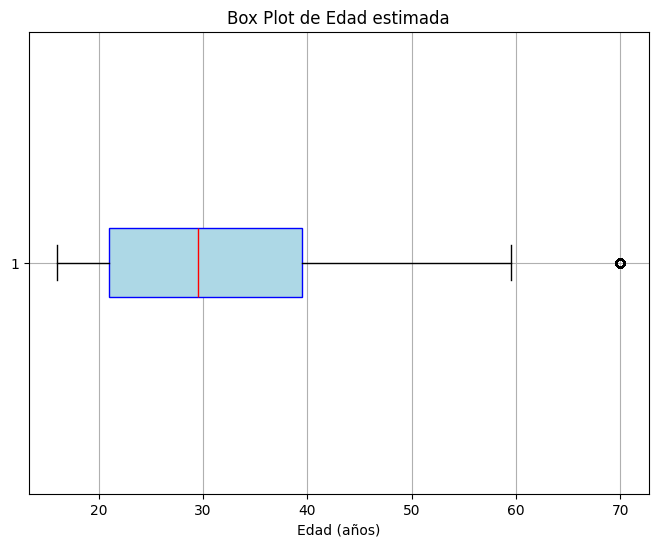

In [21]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Extraer la columna Age
query = "SELECT Age FROM main WHERE Age IS NOT NULL"
df_raw = pd.read_sql_query(query, conn)
conn.close()

# Diccionario para convertir rangos a valores numéricos
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}

# Aplicar el mapeo directamente sobre df_raw
df_raw['AgeNumeric'] = df_raw['Age'].map(age_map)

# Eliminar valores no mapeados
df_clean = df_raw.dropna(subset=['AgeNumeric'])

# Crear el box plot
plt.figure(figsize=(8, 6))
plt.boxplot([df_clean['AgeNumeric']], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'))

plt.title('Box Plot de Edad estimada')
plt.xlabel('Edad (años)')
plt.grid(True)
plt.show()


### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


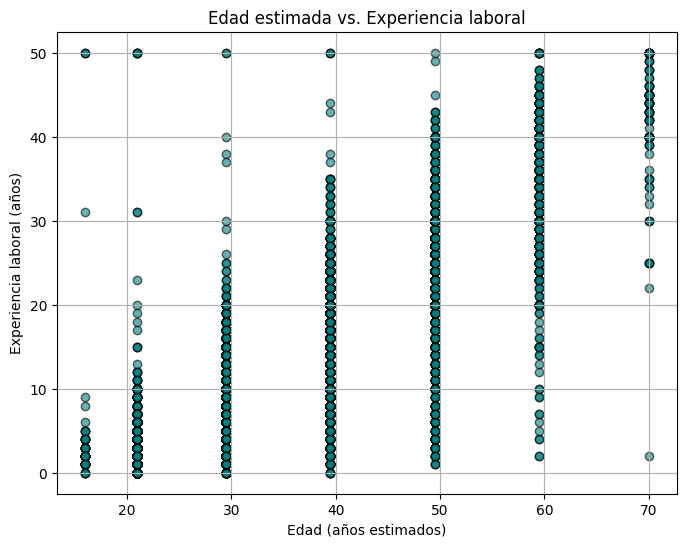

In [22]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Extraer Age y WorkExp
query = "SELECT Age, WorkExp FROM main WHERE Age IS NOT NULL AND WorkExp IS NOT NULL"
df = pd.read_sql_query(query, conn)
conn.close()

# Mapeo de rangos de edad a valores numéricos
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}
df['AgeNumeric'] = df['Age'].map(age_map)

# Convertir WorkExp a numérico (por si hay texto)
df['WorkExp'] = pd.to_numeric(df['WorkExp'], errors='coerce')

# Eliminar filas con valores nulos
df_clean = df.dropna(subset=['AgeNumeric', 'WorkExp'])

# Crear el scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['AgeNumeric'], df_clean['WorkExp'], alpha=0.6, color='teal', edgecolors='k')

plt.title('Edad estimada vs. Experiencia laboral')
plt.xlabel('Edad (años estimados)')
plt.ylabel('Experiencia laboral (años)')
plt.grid(True)
plt.show()


**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [26]:
import sqlite3
import pandas as pd

# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Consulta SQL
query = """
SELECT Age, TimeSearching, Frustration
FROM main
WHERE Age IS NOT NULL
  AND TimeSearching IS NOT NULL
  AND Frustration IS NOT NULL
"""

# Ejecutar la consulta y cargar los datos en un DataFrame
df = pd.read_sql_query(query, conn)

# Cerrar la conexión
conn.close()

# Mostrar los primeros resultados
print(df.head())


               Age               TimeSearching  \
0  35-44 years old         30-60 minutes a day   
1  35-44 years old         30-60 minutes a day   
2  45-54 years old        60-120 minutes a day   
3  25-34 years old         15-30 minutes a day   
4  25-34 years old  Less than 15 minutes a day   

                                         Frustration  
0  Amount of technical debt;Number of software to...  
1  Amount of technical debt;Complexity of tech st...  
2  Amount of technical debt;Complexity of tech st...  
3  Amount of technical debt;Tracking my work;Comp...  
4  Number of software tools in use;Tracking my wo...  


In [27]:
import sqlite3

conn = sqlite3.connect('survey-data.sqlite')
cursor = conn.cursor()

# Obtener nombres de columnas
cursor.execute("PRAGMA table_info(main)")
columns = cursor.fetchall()
conn.close()

# Mostrar nombres
for col in columns:
    print(col[1])


ResponseId
MainBranch
Age
Employment
RemoteWork
Check
CodingActivities
EdLevel
LearnCode
LearnCodeOnline
TechDoc
YearsCode
YearsCodePro
DevType
OrgSize
PurchaseInfluence
BuyNewTool
BuildvsBuy
TechEndorse
Country
Currency
CompTotal
LanguageHaveWorkedWith
LanguageWantToWorkWith
LanguageAdmired
DatabaseHaveWorkedWith
DatabaseWantToWorkWith
DatabaseAdmired
PlatformHaveWorkedWith
PlatformWantToWorkWith
PlatformAdmired
WebframeHaveWorkedWith
WebframeWantToWorkWith
WebframeAdmired
EmbeddedHaveWorkedWith
EmbeddedWantToWorkWith
EmbeddedAdmired
MiscTechHaveWorkedWith
MiscTechWantToWorkWith
MiscTechAdmired
ToolsTechHaveWorkedWith
ToolsTechWantToWorkWith
ToolsTechAdmired
NEWCollabToolsHaveWorkedWith
NEWCollabToolsWantToWorkWith
NEWCollabToolsAdmired
OpSysPersonal use
OpSysProfessional use
OfficeStackAsyncHaveWorkedWith
OfficeStackAsyncWantToWorkWith
OfficeStackAsyncAdmired
OfficeStackSyncHaveWorkedWith
OfficeStackSyncWantToWorkWith
OfficeStackSyncAdmired
AISearchDevHaveWorkedWith
AISearchDevWantTo

In [28]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('survey-data.sqlite')
query = "SELECT DISTINCT JobSat FROM main WHERE JobSat IS NOT NULL"
df_jobsat = pd.read_sql_query(query, conn)
conn.close()

print(df_jobsat)


    JobSat
0      8.0
1      5.0
2     10.0
3      6.0
4      9.0
5      4.0
6      7.0
7      3.0
8      2.0
9      1.0
10     0.0


In [31]:
import sqlite3
import pandas as pd

# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Consulta SQL que incluye JobSat
query = """
SELECT Age, TimeSearching, JobSat
FROM main
WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL AND JobSat IS NOT NULL
"""

# Ejecutar la consulta
df = pd.read_sql_query(query, conn)
conn.close()


In [32]:
# Asegurarse de que JobSat sea numérico
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Crear la nueva variable Frustracion
df['Frustracion'] = 10 - df['JobSat']


In [33]:
print(df[['JobSat', 'Frustracion']].head())


   JobSat  Frustracion
0     8.0          2.0
1     8.0          2.0
2     5.0          5.0
3    10.0          0.0
4     6.0          4.0


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.12/site-packages/matplotlib/pyplot.py'>

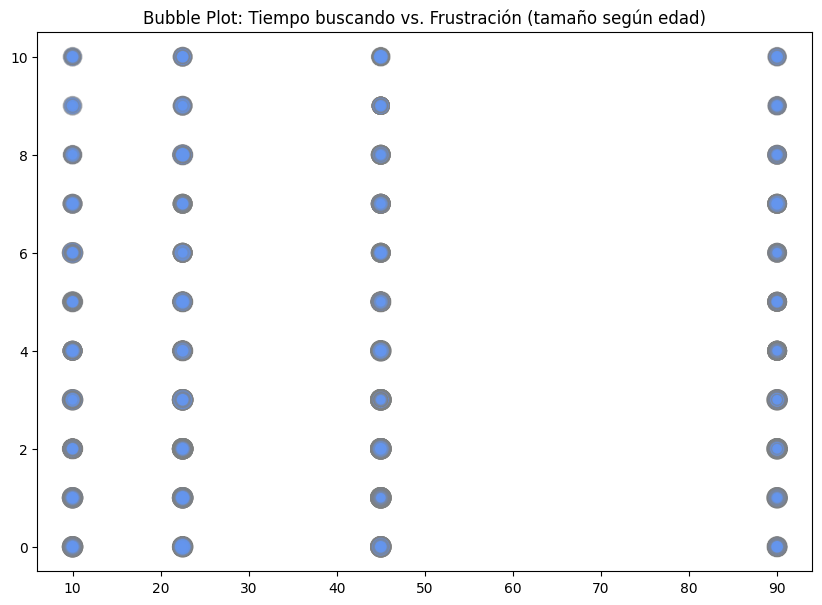

In [34]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Consulta SQL
query = """
SELECT Age, TimeSearching, JobSat
FROM main
WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL AND JobSat IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Convertir JobSat a numérico y crear Frustracion
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df['Frustracion'] = 10 - df['JobSat']

# Mapeo de Age a valores numéricos
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}
df['AgeNumeric'] = df['Age'].map(age_map)

# Mapeo de TimeSearching a minutos
time_map = {
    'Less than 15 minutes a day': 10,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'More than 120 minutes a day': 150
}
df['TimeMinutes'] = df['TimeSearching'].map(time_map)

# Eliminar filas con valores nulos
df_clean = df.dropna(subset=['Frustracion', 'TimeMinutes', 'AgeNumeric'])

# Crear el bubble plot
plt.figure(figsize=(10, 7))
plt.scatter(df_clean['TimeMinutes'], df_clean['Frustracion'],
            s=df_clean['AgeNumeric']*3, alpha=0.5,
            color='cornflowerblue', edgecolors='gray')

plt.title('Bubble Plot: Tiempo buscando vs. Frustración (tamaño según edad)')
plt

In [35]:
print(df_clean['AgeNumeric'].describe())


count    26489.000000
mean        34.362377
std          9.728463
min         16.000000
25%         29.500000
50%         29.500000
75%         39.500000
max         70.000000
Name: AgeNumeric, dtype: float64


In [36]:
# Escalar AgeNumeric entre 50 y 300 para el tamaño de burbuja
min_size = 50
max_size = 300

age_scaled = (df_clean['AgeNumeric'] - df_clean['AgeNumeric'].min()) / \
             (df_clean['AgeNumeric'].max() - df_clean['AgeNumeric'].min())

bubble_size = min_size + age_scaled * (max_size - min_size)


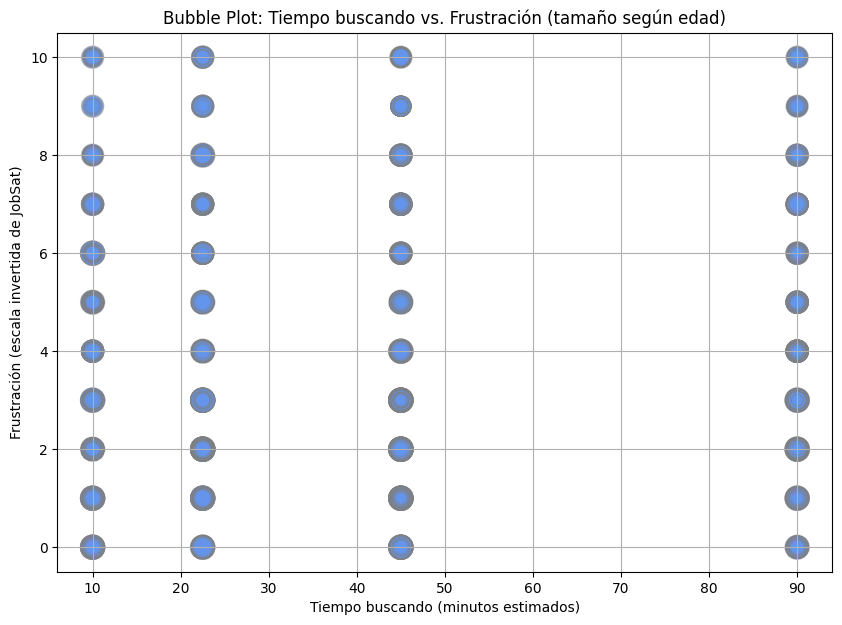

In [37]:
plt.figure(figsize=(10, 7))
plt.scatter(df_clean['TimeMinutes'], df_clean['Frustracion'],
            s=bubble_size, alpha=0.5,
            color='cornflowerblue', edgecolors='gray')

plt.title('Bubble Plot: Tiempo buscando vs. Frustración (tamaño según edad)')
plt.xlabel('Tiempo buscando (minutos estimados)')
plt.ylabel('Frustración (escala invertida de JobSat)')
plt.grid(True)
plt.show()


### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


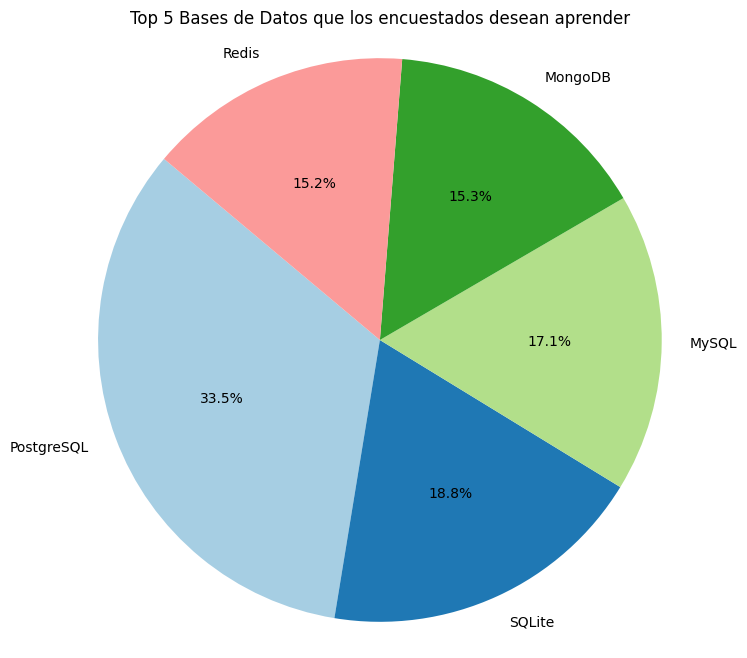

In [38]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Consulta SQL
query = "SELECT DatabaseWantToWorkWith FROM main WHERE DatabaseWantToWorkWith IS NOT NULL"
df = pd.read_sql_query(query, conn)
conn.close()

# Separar múltiples respuestas
all_dbs = df['DatabaseWantToWorkWith'].str.split(';').explode().str.strip()

# Contar frecuencia
db_counts = all_dbs.value_counts().head(5)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(db_counts, labels=db_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title('Top 5 Bases de Datos que los encuestados desean aprender')
plt.axis('equal')  # Para que el círculo sea perfecto
plt.show()


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [39]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Consulta SQL para extraer datos de los grupos de edad cercanos a 30–35
query = """
SELECT Age, TimeSearching, TimeAnswering
FROM main
WHERE Age IN ('25-34 years old', '35-44 years old')
  AND TimeSearching IS NOT NULL
  AND TimeAnswering IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()


In [40]:
# Mapeo de rangos de tiempo a minutos estimados
time_map = {
    'Less than 15 minutes a day': 10,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'More than 120 minutes a day': 150
}

df['TimeSearchingMin'] = df['TimeSearching'].map(time_map)
df['TimeAnsweringMin'] = df['TimeAnswering'].map(time_map)

# Eliminar nulos
df_clean = df.dropna(subset=['TimeSearchingMin', 'TimeAnsweringMin'])


In [41]:
# Agrupar por Age y calcular medianas
grouped = df_clean.groupby('Age')[['TimeSearchingMin', 'TimeAnsweringMin']].median()


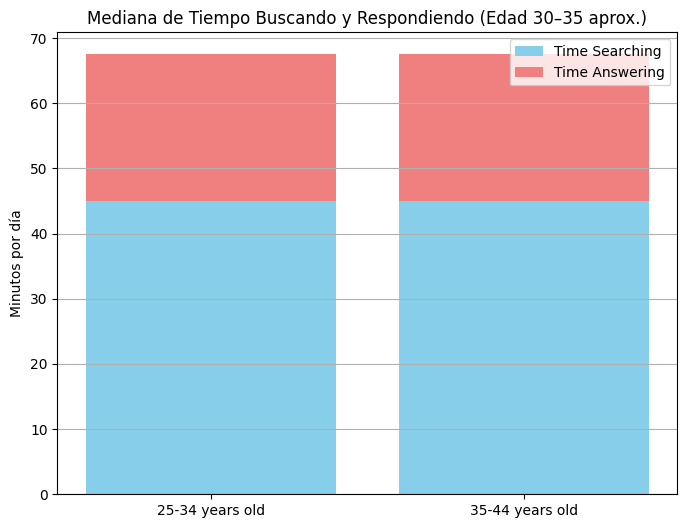

In [42]:
# Crear gráfico
plt.figure(figsize=(8, 6))

# Barras apiladas
plt.bar(grouped.index, grouped['TimeSearchingMin'], label='Time Searching', color='skyblue')
plt.bar(grouped.index, grouped['TimeAnsweringMin'], bottom=grouped['TimeSearchingMin'], label='Time Answering', color='lightcoral')

plt.title('Mediana de Tiempo Buscando y Respondiendo (Edad 30–35 aprox.)')
plt.ylabel('Minutos por día')
plt.legend()
plt.grid(True, axis='y')
plt.show()


### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


In [43]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Consulta SQL para edades entre 45 y 64
query = """
SELECT Age, CompTotal
FROM main
WHERE Age IN ('45-54 years old', '55-64 years old')
  AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()


In [44]:
# Mapeo de rangos de edad a edad media
age_map = {
    '45-54 years old': 49.5,
    '55-64 years old': 59.5
}
df['AgeNumeric'] = df['Age'].map(age_map)

# Convertir CompTotal a numérico
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Eliminar nulos
df_clean = df.dropna(subset=['AgeNumeric', 'CompTotal'])


In [45]:
# Agrupar por edad estimada
grouped = df_clean.groupby('AgeNumeric')['CompTotal'].median().reset_index()


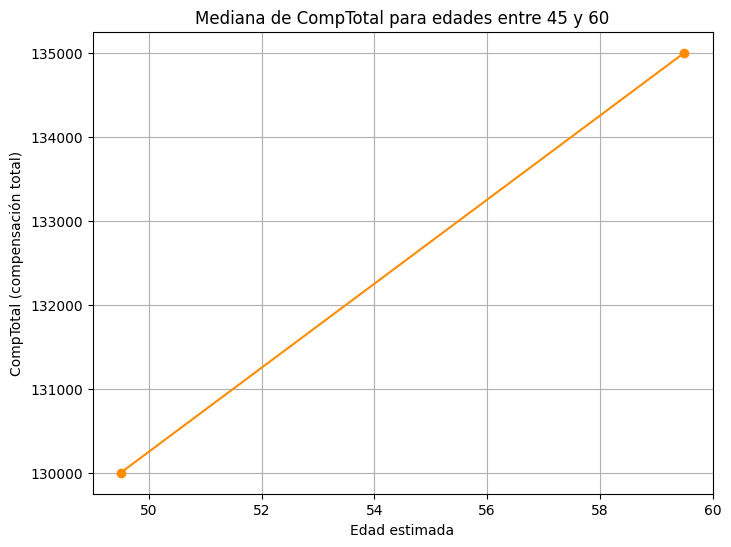

In [46]:
plt.figure(figsize=(8, 6))
plt.plot(grouped['AgeNumeric'], grouped['CompTotal'], marker='o', color='darkorange')

plt.title('Mediana de CompTotal para edades entre 45 y 60')
plt.xlabel('Edad estimada')
plt.ylabel('CompTotal (compensación total)')
plt.grid(True)
plt.show()


**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Consulta SQL
query = "SELECT MainBranch FROM main WHERE MainBranch IS NOT NULL"
df = pd.read_sql_query(query, conn)
conn.close()

# Contar frecuencia de cada tipo de rol
branch_counts = df['MainBranch'].value_counts()

# Crear gráfico de barras horizontal
plt.figure(figsize=(10, 6))
plt.barh(branch_counts.index, branch_counts.values, color='mediumseagreen')

plt.title('Distribución de roles principales (MainBranch)')
plt.xlabel('Número de encuestados')
plt.ylabel('Tipo de rol principal')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
